In [5]:
!pip3 install textblob
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt


[notice] A new release of pip available: 22.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:

# from pandas import *
 
# reading CSV file
# datas = read_csv("/content/drive/MyDrive/ColabData/twitter_2013_gezi.csv")
 
# converting column data to list
# data = datas['tweet'].tolist()


In [7]:
#from google.colab import drive
#drive.mount('/content/drive')

In [8]:
#comment_data = pd.read_csv('twitter_wd_panamabelgeleri_03012016_06152016.csv', sep=';')
fileName  = "twitter_2019_2020_pandemi.csv"
comment_data = pd.read_csv("twitter_2018_rahip_brunson.csv")
comment_data.head()


,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1062857549806850048,1062857549806850048,2018-11-15 02:59:21 Turkey Standard Time,2018-11-15,02:59:21,300,76456280,dbscoins,DBS Coins,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1062857451190382594,1062857451190382594,2018-11-15 02:58:57 Turkey Standard Time,2018-11-15,02:58:57,300,978624920598073344,derinalan11,weddingbarefoot,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1062857337067761664,1062857337067761664,2018-11-15 02:58:30 Turkey Standard Time,2018-11-15,02:58:30,300,26575282,treverkruger,Trever //,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1062856716478369792,1062856716478369792,2018-11-15 02:56:02 Turkey Standard Time,2018-11-15,02:56:02,300,110329096,daiichi_f24,第一商品 マーケット速報,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1062856632575479808,1062856632575479808,2018-11-15 02:55:42 Turkey Standard Time,2018-11-15,02:55:42,300,76456280,dbscoins,DBS Coins,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [9]:
# create new dataFrame that contains only comments. ([[]])
data = comment_data[['tweet']]
data.head()


,tweet
0,"Gold settles higher after recent downdraft, wi..."
1,#gloves #wedding #lace #ivory #bridalgown #wed...
2,#BOSTON @SisterSparrowDB is happening TOMORROW...
3,"第一商品金地金参考価格(1kg税込) 8:45現在 販売 4,784,000円 買取 4,7..."
4,"Gold gains 1 percent on dollar retreat, short-..."


In [10]:
# removing stop words with gensim
import gensim
from gensim.parsing.preprocessing import remove_stopwords

all_stopwords = gensim.parsing.preprocessing.STOPWORDS

# gensim have larger stop word pool than NLTK
print(all_stopwords)


frozenset({'behind', 'it', 'thereby', 'hasnt', 'anything', 'otherwise', 'fifty', 'beyond', 'one', 'himself', 'together', 'con', 'by', 'amongst', 'amount', 'kg', 'other', 'hereafter', 'no', 'doesn', 'last', 'being', 'computer', 'full', 'whenever', 'further', 'ours', 'he', 'such', 'don', 'becomes', 'towards', 'now', 'what', 'the', 'etc', 'bottom', 'sometime', 'nevertheless', 'still', 'using', 'front', 'same', 'quite', 'seeming', 'to', 'on', 'out', 'we', 'which', 'back', 'without', 'us', 'whatever', 'least', 'unless', 'whither', 'those', 'mostly', 'eleven', 'itself', 'until', 'name', 'may', 'mine', 'doing', 'during', 'myself', 'neither', 'yourself', 'go', 'her', 'since', 'take', 'others', 'via', 'who', 'cannot', 'alone', 'seemed', 'before', 'where', 'nor', 'i', 'yourselves', 'indeed', 'if', 'would', 'even', 'whom', 'always', 'therefore', 'five', 'thick', 'most', 'should', 'might', 'twelve', 'across', 'again', 'fifteen', 'rather', 'meanwhile', 'while', 'yours', 'thereafter', 'ltd', 'therei

In [11]:
# Cleaning text.
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove text starts with @, replace with '' and assign to text.
    text = re.sub(r'#', '', text) # Remove the '#'.
    text = re.sub(r'https?:\/\/\S+', '', text) # remove hyperlink [\r\n]
    text = re.sub(r'[\r\n]', ' ', text) # remove new lines
    #text = re.sub(r'(&|>|<)', '', text) #(\w*&\w+|\w+&\w*|\w*>\w+|\w+>\w*|\w*<\w+|\w+<\w*)
    text = re.sub(r'(\w*&\w+\W|\w+&\w*]|\w*>|\w+>\w*|\w*<\w+\W|\w+<\w*|&amp|>|<)', '', text)
    text = re.sub(r'(\s*;\s|[\W][.]\s)', ' ', text)
    text = text.strip() # remove trailing and leading white spaces.
    text = text.lower()
    
    # removing stop words using gensim
    text = remove_stopwords(text)
    
    return text


In [12]:
# apply data pre-processing.
new_data = data['tweet'].apply(clean_text)
new_data = pd.DataFrame(data=new_data, dtype=object)

# exclude sentences that have less than 2 words
#new_data['word_counter'] = new_data['body'].apply(lambda x:len(str(x).split())) 
#mask = new_data['word_counter'] > 2
#new_data = new_data[mask]

# Show cleaned data
new_data.head()
print('Total comments: ', len(new_data))

Total comments:  45600


In [13]:
# create the method to get subjectivity
# subjectivity tells us how subjective or opinionated the text is.
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# create the method to get the polarity
# polarity tells how positive or negative the text is.
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

# Create columns subjectivity and polarity.
new_data['Subjectivity'] = new_data['tweet'].apply(get_subjectivity)
new_data['Polarity'] = new_data['tweet'].apply(get_polarity)


new_data.head(50)

,tweet,Subjectivity,Polarity
0,"gold settles higher recent downdraft, inflatio...",0.283333,0.116667
1,gloves wedding lace ivory bridalgown weddingdr...,0.600000,0.500000
2,boston happening tomorrow _music!! tickets now...,0.602273,-0.306818
3,"第一商品金地金参考価格(1kg税込) 8:45現在 販売 4,784,000円 買取 4,7...",0.000000,0.000000
4,"gold gains 1 percent dollar retreat, short-cov...",0.000000,0.000000
5,gadaffi value gold rubies stones fruits silver...,0.400000,0.650000
6,paulson keeps stake gold investments q3 -filin...,0.000000,0.000000
7,excited share latest addition etsy shop: ciner...,0.694444,0.236111
8,excited share latest addition etsy shop: vinta...,0.825000,0.437500
9,excited share latest addition etsy shop: vinta...,0.594242,0.135606


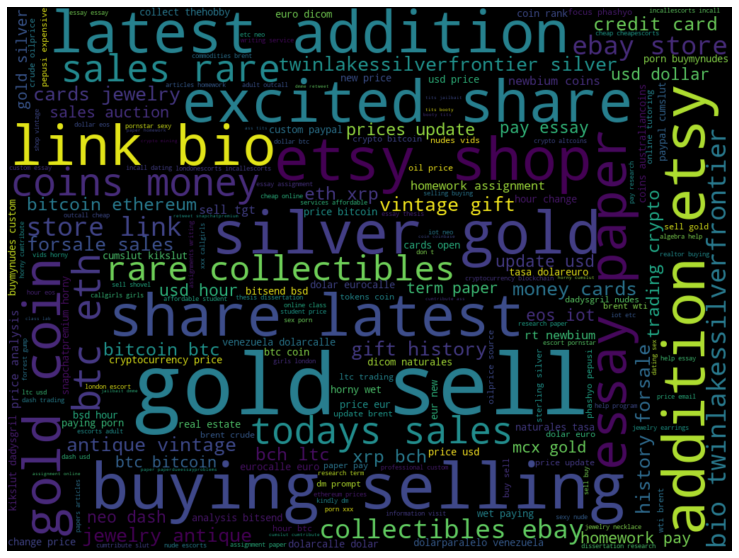

In [14]:
# visualize data with word cloud
all_comments = ' '.join ( [comments for comments in new_data['tweet']])
word_cloud = WordCloud(width=1024, height=768, random_state=21, max_font_size = 120).generate(all_comments)

plt.figure( figsize=(20,10) )
plt.imshow(word_cloud, interpolation = "bilinear")
plt.axis('off')
plt.show()


In [15]:
# Method to label neg., neutral and positive comments
def get_analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

new_data['Analysis'] = new_data['Polarity'].apply(get_analysis)

In [16]:
# show new_data with sentiment labels
new_data.head()


,tweet,Subjectivity,Polarity,Analysis
0,"gold settles higher recent downdraft, inflatio...",0.283333,0.116667,Positive
1,gloves wedding lace ivory bridalgown weddingdr...,0.600000,0.500000,Positive
2,boston happening tomorrow _music!! tickets now...,0.602273,-0.306818,Negative
3,"第一商品金地金参考価格(1kg税込) 8:45現在 販売 4,784,000円 買取 4,7...",0.000000,0.000000,Neutral
4,"gold gains 1 percent dollar retreat, short-cov...",0.000000,0.000000,Neutral


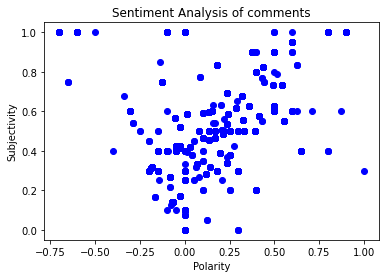

<Figure size 1440x720 with 0 Axes>

In [17]:
# Plot the polarity and subj.

for i in range(0, int((new_data.shape[0])/10)):
    plt.scatter(new_data['Polarity'][i], new_data['Subjectivity'][i], color='Blue')
    
plt.title('Sentiment Analysis of comments')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.figure( figsize=(20,10) )
plt.show()


In [18]:
positive_comments = new_data[new_data.Analysis == 'Positive']
positive_comments = positive_comments['tweet']

round( (positive_comments.shape[0] / new_data.shape[0]) *100, 1 )



38.9

In [19]:
neg_comments = new_data[new_data.Analysis == 'Negative']
neg_comments = neg_comments['tweet']

round( (neg_comments.shape[0] / new_data.shape[0]) *100, 1 )

15.0

In [20]:
neutral_comments =  new_data[new_data.Analysis == 'Neutral']
neutral_comments = neutral_comments['tweet']

round( (neutral_comments.shape[0] / new_data.shape[0]) *100, 1 )

46.1

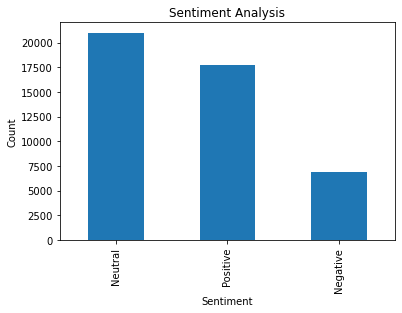

In [21]:

new_data['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
new_data['Analysis'].value_counts().plot(kind='bar')
plt.show()

In [22]:
# save pre processed DataFrame to CSV file
new_data.to_csv("preprocessed_twitter_2018_rahip_brunson.csv")

In [23]:
import pandas as pd
  
# read CSV file
results = pd.read_csv("preprocessed_twitter_2018_rahip_brunson.csv")
  
# count no. of lines
print("Number of lines present:-", 
      len(results))

Number of lines present:- 45600
